In [2]:
from kmodes.kprototypes import KPrototypes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing, cluster, pipeline, compose, decomposition

In [3]:
dfClean = pd.read_csv('dfCleanV2.csv')

In [4]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99339 entries, 0 to 99338
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   totalPrice             99339 non-null  float64
 1   review_score           99339 non-null  float64
 2   payment_sequential     99339 non-null  float64
 3   payment_type           99339 non-null  object 
 4   payment_installments   99339 non-null  float64
 5   customer_state         99339 non-null  object 
 6   product_category_name  99339 non-null  object 
 7   date                   99339 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 6.1+ MB


In [9]:
X = dfClean.values

In [10]:
n_clusters = 3
kproto = KPrototypes(n_clusters=n_clusters, init='Cao', verbose=2)
clusters = kproto.fit_predict(X, categorical=[3,5,6])
clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4593, ncost: 1409211834.1154945
Run: 1, iteration: 2/100, moves: 4409, ncost: 1351944548.4479458
Run: 1, iteration: 3/100, moves: 3525, ncost: 1317000770.598071
Run: 1, iteration: 4/100, moves: 2602, ncost: 1289616092.7698565
Run: 1, iteration: 5/100, moves: 1658, ncost: 1274661605.56988
Run: 1, iteration: 6/100, moves: 1032, ncost: 1269539835.5102758
Run: 1, iteration: 7/100, moves: 527, ncost: 1267826847.305729
Run: 1, iteration: 8/100, moves: 317, ncost: 1266611288.962706
Run: 1, iteration: 9/100, moves: 302, ncost: 1265152373.791759
Run: 1, iteration: 10/100, moves: 212, ncost: 1264623208.384577
Run: 1, iteration: 11/100, moves: 110, ncost: 1264534071.5137725
Run: 1, iteration: 12/100, moves: 51, ncost: 1264519038.456847
Run: 1, iteration: 

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [11]:
dfClean['ClustersLabel'] = kproto.labels_

In [12]:
dfClean.head(30)

,totalPrice,review_score,payment_sequential,payment_type,payment_installments,customer_state,product_category_name,date,ClustersLabel
0,72.19,5.0,1.0,credit_card,2.0,Rio de Janeiro,Gadget,2017,0
1,259.83,4.0,1.0,credit_card,3.0,São Paulo,Animalerie,2017,0
2,216.87,5.0,1.0,credit_card,5.0,Minas Gerais,Furniture,2018,0
3,25.78,4.0,1.0,credit_card,2.0,São Paulo,Parfum et soin,2018,0
4,218.04,5.0,1.0,credit_card,3.0,São Paulo,Quincalerie,2017,0
5,34.59,4.0,1.0,boleto,1.0,Minas Gerais,Housing,2017,0
6,31.75,4.0,1.0,credit_card,1.0,São Paulo,Telephonie et sécurite,2017,0
7,880.75,5.0,1.0,credit_card,10.0,São Paulo,Quincalerie,2018,1
8,157.60,1.0,1.0,credit_card,3.0,São Paulo,Parfum et soin,2018,0
9,65.39,4.0,1.0,credit_card,1.0,São Paulo,Livre et papeterie,2018,0


In [13]:
dfClean['Segment'] = dfClean['ClustersLabel'].map({0:'First', 1:'Second', 2:'Third'})

In [14]:
dfClean['Segment'] = dfClean['Segment'].astype('category')
dfClean['Segment'] = dfClean['Segment'].cat.reorder_categories(['First','Second','Third'])

In [15]:
dfClean.drop('date', axis=1, inplace=True)

In [16]:
dfClean.rename(columns = {'ClustersLabel':'Total'}, inplace = True)
dfClean.groupby('Segment').agg(
    {
        'Total':'count',
        'payment_type': lambda x: x.value_counts().index[0],
        'customer_state': lambda x: x.value_counts().index[0],
        'product_category_name': lambda x: x.value_counts().index[0],
        'payment_sequential':'mean',
        'payment_installments':'mean',
        'totalPrice': 'mean',
        'review_score': 'mean'
    }
).reset_index()

,Segment,Total,payment_type,customer_state,product_category_name,payment_sequential,payment_installments,totalPrice,review_score
0,First,88886,credit_card,São Paulo,Housing,1.086167,2.589260,108.340717,4.125498
1,Second,9501,credit_card,São Paulo,Parfum et soin,1.129039,5.002210,480.968851,3.945479
2,Third,952,credit_card,São Paulo,Informatique et electronique,1.090336,6.313025,1675.387763,3.918067


In [32]:
num = list(dfClean.select_dtypes(['float', 'int']).columns)
cat = list(dfClean.select_dtypes(['object', 'category']).columns)

In [51]:
one_hot_sparse = preprocessing.OneHotEncoder(sparse=True)
one_hot = preprocessing.OneHotEncoder(sparse=False)


# log x +1
log = preprocessing.FunctionTransformer(func=np.log1p)

# Valeur absolue
abso = preprocessing.FunctionTransformer(func=np.abs)

# Pipelines
std_log = pipeline.make_pipeline(log)
abso_std_log = pipeline.make_pipeline(abso, log)

In [52]:
preprocessor_sparse = compose.make_column_transformer(
    (abso_std_log, num),
    (one_hot_sparse, cat)
)

In [53]:
preprocessor = compose.make_column_transformer(
    (abso_std_log, num),
    (one_hot, cat)
)

PCA

In [54]:
X = dfClean
n_comp = 6  # Nombre de dimensions
features = dfClean.columns  # Extraction des noms de variables
names = dfClean.index  # Ex

In [55]:
pca = decomposition.PCA(n_components=n_comp)

pipeline_pca = pipeline.make_pipeline(preprocessor, pca)

In [56]:


pipeline_pca.fit(X)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('functiontransformer-1',
                                                                   FunctionTransformer(func=<ufunc 'absolute'>)),
                                                                  ('functiontransformer-2',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                  ['totalPrice', 'review_score',
                                                   'payment_sequential',
                                                   'payment_installments',
                                                   'date', 'group']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['payment_type',
                                                   'customer_state',
                                                   'product_category_name'])])),
                ('pca', PCA(n_components=6))])

In [57]:
print(pipeline_pca[1].explained_variance_ratio_)

[0.2290109  0.11863181 0.08150014 0.06116754 0.04913018 0.04273449]


In [58]:
labels = pd.get_dummies(X).columns
labels

Index(['totalPrice', 'review_score', 'payment_sequential',
       'payment_installments', 'date', 'group', 'payment_type_boleto',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_voucher', 'customer_state_Acre', 'customer_state_Alagoas',
       'customer_state_Amapá', 'customer_state_Amazonas',
       'customer_state_Bahia', 'customer_state_Ceará',
       'customer_state_District fédéral (Brasília)',
       'customer_state_Espírito Santo', 'customer_state_Goiás',
       'customer_state_Maranhão', 'customer_state_Mato Grosso',
       'customer_state_Mato Grosso do Sul', 'customer_state_Minas Gerais',
       'customer_state_Paraná', 'customer_state_Paraíba',
       'customer_state_Pará', 'customer_state_Pernambuco',
       'customer_state_Piauí', 'customer_state_Rio Grande do Norte',
       'customer_state_Rio Grande do Sul', 'customer_state_Rio de Janeiro',
       'customer_state_Rondônia', 'customer_state_Roraima',
       'customer_state_Santa Catarina

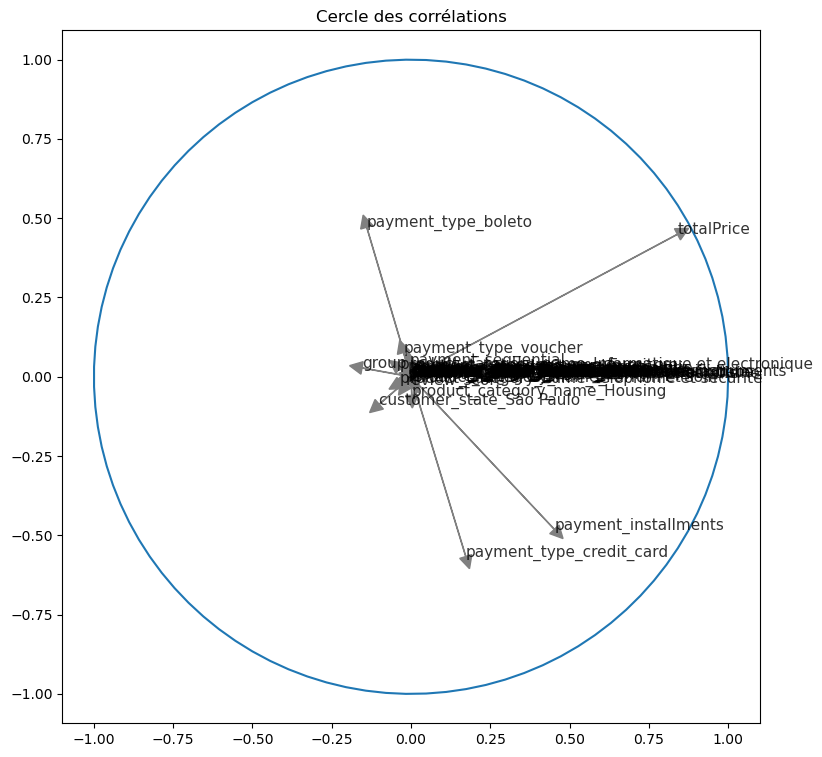

In [59]:
(fig, ax) = plt.subplots(figsize=(9, 9))
for i in range(0, pipeline_pca[1].components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  # 0 for PC1
             pca.components_[1, i],  # 1 for PC2
             head_width=0.04,
             head_length=0.04,
             color='gray'
             )

    plt.text(pca.components_[0, i],
             pca.components_[1, i],
             labels[i],
             fontsize=11,
             alpha=0.8
             )


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Cercle des corrélations')
plt.show()


/tmp/ipykernel_34078/1388100541.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True)


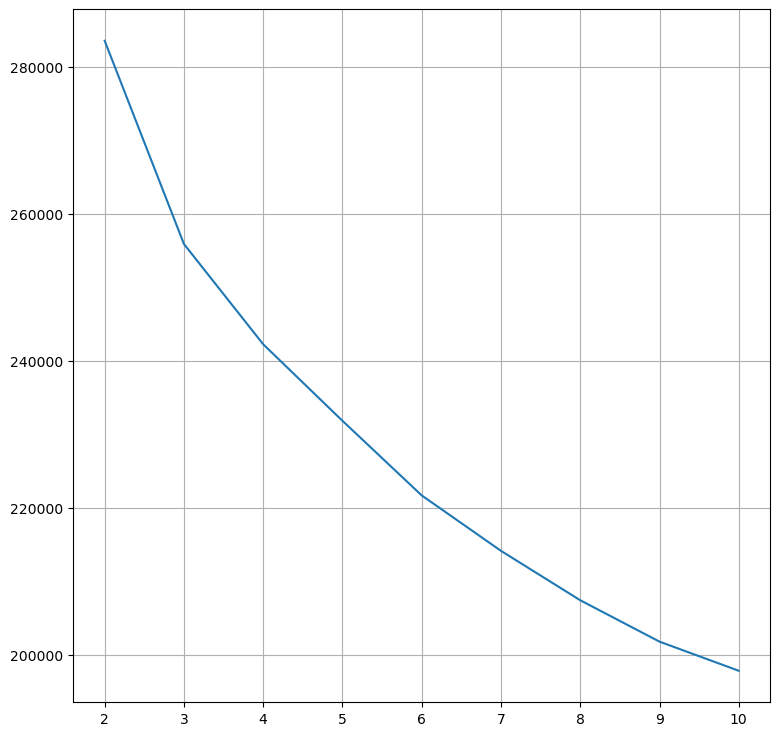

In [60]:
inertia = []
nb_cluster_max = 10
for z in range(2,nb_cluster_max+1):
    kmeans = cluster.KMeans(n_clusters = z)
    k_pipe = pipeline.make_pipeline(preprocessor, kmeans)
    k_pipe.fit(X)
    inertia.append(k_pipe[1].inertia_)
    
x = np.arange(2,nb_cluster_max+1)

fig, ax = plt.subplots(figsize=(9, 9))
ax.set_xticks(ticks=np.arange(0,25,1))
ax.grid(b=True)
plt.plot(x, inertia)
plt.show()

In [61]:
kmeans = cluster.KMeans(n_clusters = 5)
k_pipe = pipeline.make_pipeline(preprocessor, kmeans).fit(X)
pred = k_pipe.predict(X)

In [62]:
def display_factorial_planes_sns(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None, title=None, cmap=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                fig, ax = plt.subplots(figsize=(10,10))
                sns.scatterplot(x=X_projected[:, d1], y=X_projected[:, d2], hue=illustrative_var, alpha=alpha,  palette=cmap)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.savefig(title)
            plt.show(block=False)

In [63]:
cmap = {
    0:'Crimson',
    1:'Sienna',
    2:'DarkBlue',
    3:'Orange',
    4:'Black',
    5:'Silver',
    6:'Chartreuse',
    7:'Fuchsia',
    8:'gray',
    9:'gray',
    10:'gray',
    11:'gray',
}

In [64]:
X_projected = pipeline_pca.transform(X)

<Figure size 700x600 with 0 Axes>

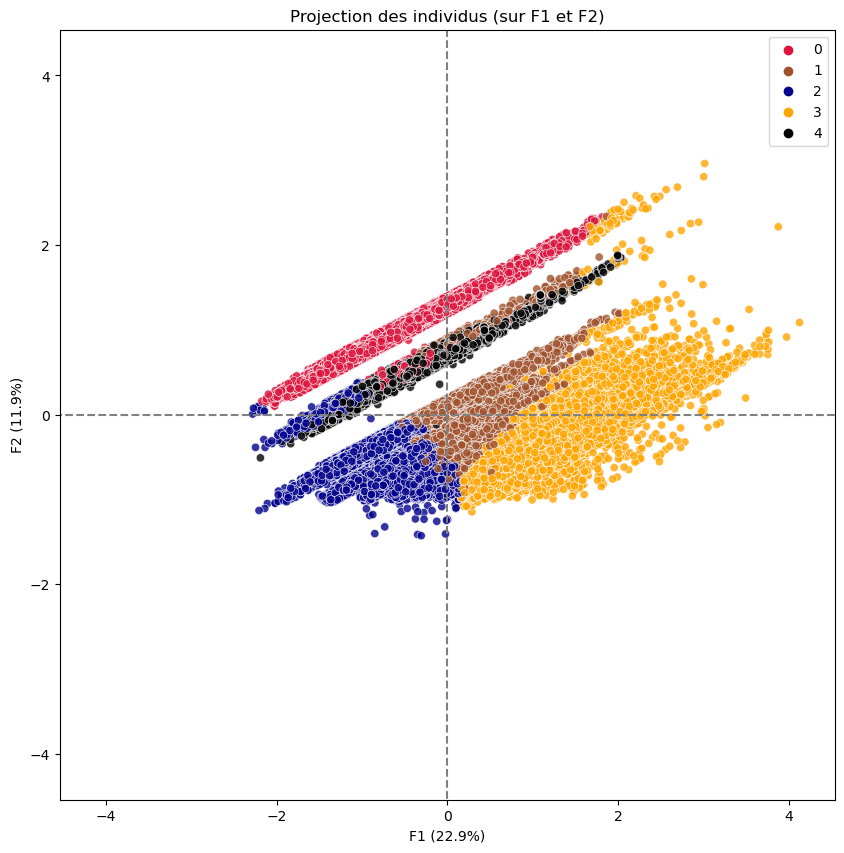

<Figure size 700x600 with 0 Axes>

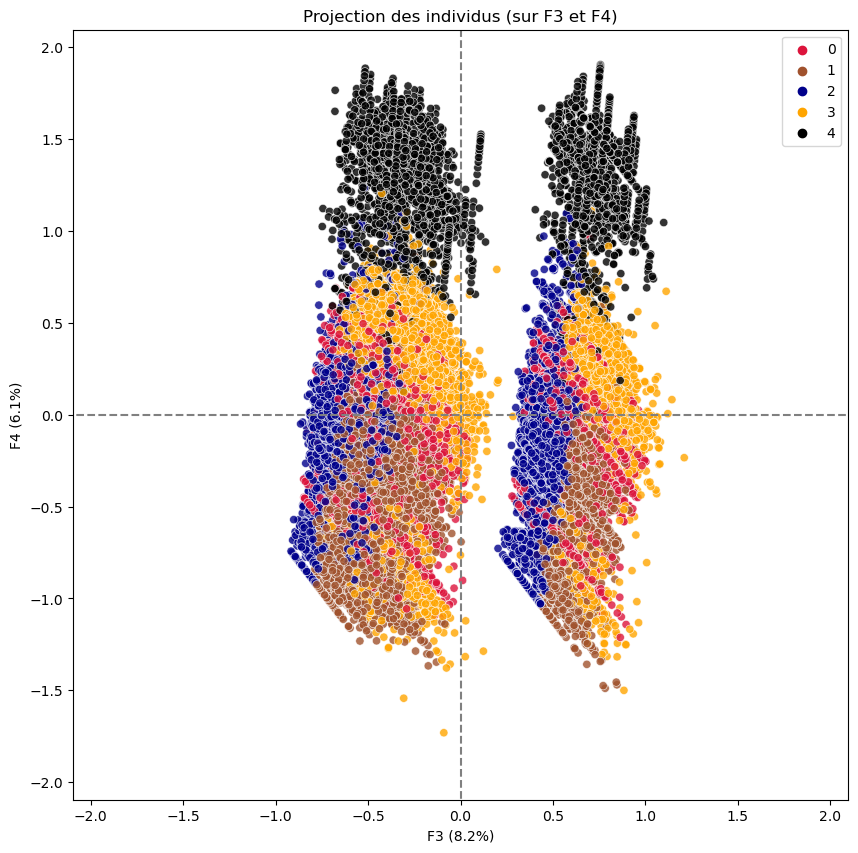

<Figure size 700x600 with 0 Axes>

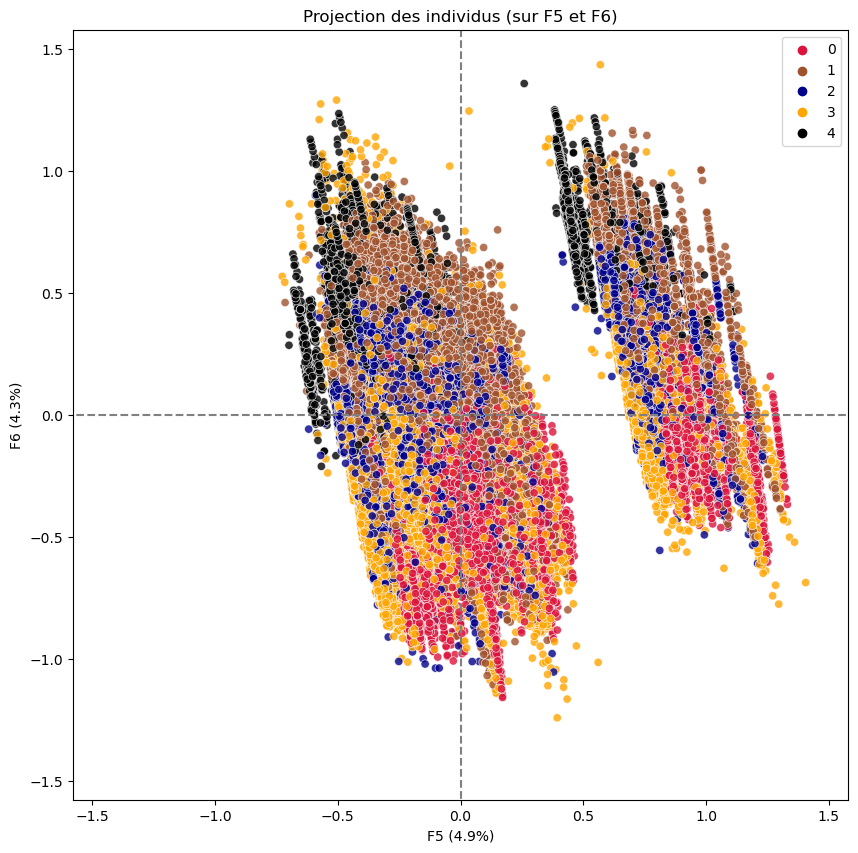

In [65]:
display_factorial_planes_sns(X_projected, n_comp, pipeline_pca[1], [(0,1),(2,3),(4,5)], illustrative_var=pred, title='Projection_indiv', alpha=0.8, cmap=cmap)

In [66]:
labels


Index(['totalPrice', 'review_score', 'payment_sequential',
       'payment_installments', 'date', 'group', 'payment_type_boleto',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_voucher', 'customer_state_Acre', 'customer_state_Alagoas',
       'customer_state_Amapá', 'customer_state_Amazonas',
       'customer_state_Bahia', 'customer_state_Ceará',
       'customer_state_District fédéral (Brasília)',
       'customer_state_Espírito Santo', 'customer_state_Goiás',
       'customer_state_Maranhão', 'customer_state_Mato Grosso',
       'customer_state_Mato Grosso do Sul', 'customer_state_Minas Gerais',
       'customer_state_Paraná', 'customer_state_Paraíba',
       'customer_state_Pará', 'customer_state_Pernambuco',
       'customer_state_Piauí', 'customer_state_Rio Grande do Norte',
       'customer_state_Rio Grande do Sul', 'customer_state_Rio de Janeiro',
       'customer_state_Rondônia', 'customer_state_Roraima',
       'customer_state_Santa Catarina

In [67]:
dfClean['group'] = pred
df = pd.get_dummies(dfClean)

In [68]:
df.groupby('group').agg( {'totalPrice': 'mean', 'review_score': 'mean', 'date': lambda x:x.value_counts().index[0], 
              'payment_type_boleto': lambda x:x.value_counts().index[0], 'payment_type_credit_card': lambda x:x.value_counts().index[0], 
              'payment_type_debit_card': lambda x:x.value_counts().index[0], 'payment_type_voucher': lambda x:x.value_counts().index[0], 
              'customer_state_Acre': lambda x:x.value_counts().index[0], 'customer_state_Alagoas': lambda x:x.value_counts().index[0], 
              'customer_state_Amapá': lambda x:x.value_counts().index[0], 'customer_state_Amazonas': lambda x:x.value_counts().index[0], 
              'customer_state_Bahia': lambda x:x.value_counts().index[0], 'customer_state_Ceará': lambda x:x.value_counts().index[0], 
              'customer_state_District fédéral (Brasília)': lambda x:x.value_counts().index[0], 'customer_state_Espírito Santo': lambda x:x.value_counts().index[0], 
              'customer_state_Goiás': lambda x:x.value_counts().index[0], 'customer_state_Maranhão': lambda x:x.value_counts().index[0], 
              'customer_state_Mato Grosso': lambda x:x.value_counts().index[0], 'customer_state_Mato Grosso do Sul': lambda x:x.value_counts().index[0], 
              'customer_state_Minas Gerais': lambda x:x.value_counts().index[0], 'customer_state_Paraná': lambda x:x.value_counts().index[0], 
              'customer_state_Paraíba': lambda x:x.value_counts().index[0], 'customer_state_Pará': lambda x:x.value_counts().index[0], 
              'customer_state_Pernambuco': lambda x:x.value_counts().index[0], 'customer_state_Piauí': lambda x:x.value_counts().index[0], 
              'customer_state_Rio Grande do Norte': lambda x:x.value_counts().index[0], 'customer_state_Rio Grande do Sul': lambda x:x.value_counts().index[0], 
              'customer_state_Rio de Janeiro': lambda x:x.value_counts().index[0], 'customer_state_Rondônia': lambda x:x.value_counts().index[0], 
              'customer_state_Roraima': lambda x:x.value_counts().index[0], 'customer_state_Santa Catarina': lambda x:x.value_counts().index[0], 
              'customer_state_Sergipe': lambda x:x.value_counts().index[0], 'customer_state_São Paulo': lambda x:x.value_counts().index[0], 
              'customer_state_Tocantins': lambda x:x.value_counts().index[0], 'product_category_name_Animalerie': lambda x:x.value_counts().index[0], 
              'product_category_name_Art et manufacture': lambda x:x.value_counts().index[0], 'product_category_name_Automobile': lambda x:x.value_counts().index[0], 
              'product_category_name_Cadeaux': lambda x:x.value_counts().index[0], 'product_category_name_Fashion': lambda x:x.value_counts().index[0], 
              'product_category_name_Furniture': lambda x:x.value_counts().index[0], 'product_category_name_Gadget': lambda x:x.value_counts().index[0], 
              'product_category_name_Housing': lambda x:x.value_counts().index[0], 'product_category_name_Informatique et electronique': lambda x:x.value_counts().index[0], 
              'product_category_name_Livre et papeterie': lambda x:x.value_counts().index[0], 'product_category_name_Musique et instruments': lambda x:x.value_counts().index[0], 
              'product_category_name_Nourriture et cuisine': lambda x:x.value_counts().index[0], 'product_category_name_Parfum et soin': lambda x:x.value_counts().index[0], 
              'product_category_name_Quincalerie': lambda x:x.value_counts().index[0], 'product_category_name_Sport': lambda x:x.value_counts().index[0], 
              'product_category_name_Telephonie et sécurite': lambda x:x.value_counts().index[0], 'product_category_name_Utilitaire pour bebe': lambda x:x.value_counts().index[0]})

,totalPrice,review_score,date,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,customer_state_Acre,customer_state_Alagoas,customer_state_Amapá,...,product_category_name_Housing,product_category_name_Informatique et electronique,product_category_name_Livre et papeterie,product_category_name_Musique et instruments,product_category_name_Nourriture et cuisine,product_category_name_Parfum et soin,product_category_name_Quincalerie,product_category_name_Sport,product_category_name_Telephonie et sécurite,product_category_name_Utilitaire pour bebe
group,,,,,,,,,,,,,,,,,,,,,
0,133.883938,4.105809,2018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,154.711772,3.824279,2018,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,53.950175,4.254739,2018,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,323.995812,4.241340,2018,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,133.980605,4.140108,2017,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
